In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# List all the keywords
keywords = ["hunger", "refugees", "humanitarian", "conflict", "natural disaster"]

In [3]:
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
df_ipc = df[["ipc","year_month", "district"]] # Extract useful column
df_ipc = df_ipc.dropna(subset=['ipc'])
df_ipc.rename(columns={'year_month':'date', 'district':'location_article'},inplace=True) # Rename columns in order to merge with news df
df_ipc

,ipc,date,location_article
30,2.0,2009_07,Bor
33,2.0,2009_10,Bor
36,1.0,2010_01,Bor
39,2.0,2010_04,Bor
42,2.0,2010_07,Bor
...,...,...,...
12307,3.0,2018_10,Malakal
12311,3.0,2019_02,Malakal
12315,3.0,2019_06,Malakal
12319,3.0,2019_10,Malakal


In [4]:
news_df = pd.read_csv("data/articles_topics.csv") # Read news data into DataFrame
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d').dt.strftime('%Y_%m') # Convert the date column
news_df

,summary,date,location_article,lat,lng,hunger,refugees,humanitarian,conflict,natural disaster
0,The article discusses the passing of the new C...,2011_07,Juba,4.859363,31.571250,False,False,False,False,False
1,The article discusses the military actions tak...,2011_07,Abyei,9.838551,28.486396,False,False,False,False,False
2,The article discusses the signing of a Framewo...,2011_06,Southern Kordofan,11.036544,30.895824,False,False,False,False,False
3,The article discusses the upcoming independenc...,2011_07,South Sudan,6.876992,31.306979,False,False,False,False,False
4,The article discusses the need for South Sudan...,2011_07,Juba,4.859363,31.571250,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
18515,The article discusses the successful delivery ...,2023_04,Maiwut Primary Health Care Centre,8.606200,33.924100,False,False,False,False,False
18516,The article discusses the bombing and forced e...,2023_04,Khartoum,15.500654,32.559899,False,False,False,False,False
18517,The article discusses how Prime Minister Abiy ...,2023_04,Addis Ababa,8.980603,38.757761,False,False,False,False,False
18518,The article discusses the collapse of a commer...,2023_04,Kampala International University,0.294360,32.603970,False,False,False,True,False


In [5]:
# Calculate the frequency of each keyword in different ipc
df = news_df.merge(df_ipc, on=['location_article','date'])
df = df.groupby(["ipc"])[keywords].mean()
df.reset_index(inplace=True)
df

,ipc,hunger,refugees,humanitarian,conflict,natural disaster
0,1.0,0.032871,0.010957,0.020453,0.023375,0.023375
1,2.0,0.046990,0.022026,0.048458,0.010279,0.046990
2,3.0,0.016949,0.016949,0.025424,0.012712,0.042373
3,4.0,0.153846,0.153846,0.076923,0.000000,0.153846


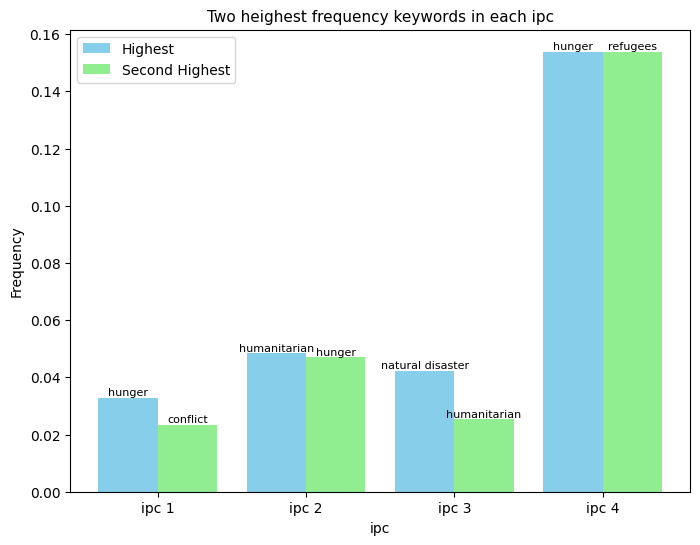

In [18]:
df_without_ipc = df.drop('ipc', axis = 1)

# Get the column label with the highest and second-highest values in each row
highest_columns = df_without_ipc.apply(lambda row: row.nlargest(2).index.tolist(), axis=1)

# Get the highest and second-highest values in each row
highest_values = df_without_ipc.apply(lambda row: row.nlargest(2).tolist(), axis=1)


plt.figure(figsize=(8, 6))

# Plot the highest and second-highest values
x = np.arange(len(df))
width = 0.4
plt.bar(x - width / 2, [value[0] for value in highest_values], width, label='Highest', color='skyblue')
plt.bar(x + width / 2, [value[1] for value in highest_values], width, label='Second Highest', color='lightgreen')

# Add labels for the columns
for i, (col1, col2) in enumerate(highest_columns):
    plt.text(x[i] - width / 2, highest_values[i][0], col1, ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width / 2, highest_values[i][1], col2, ha='center', va='bottom', fontsize=8)

plt.xlabel('ipc')
plt.ylabel('Frequency')
plt.title('Two heighest frequency keywords in each ipc', fontsize=11)
plt.xticks(x, [f'ipc {i + 1}' for i in range(len(df))])
plt.legend()
plt.show()

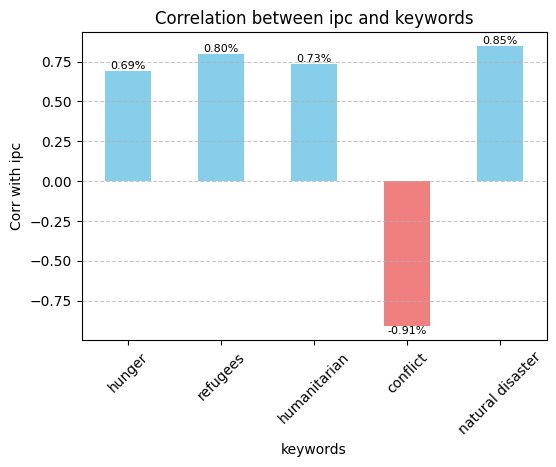

In [19]:
corr = df.corr()['ipc'].drop('ipc')
# Make color for bars
values = corr.values
colors = ['skyblue' if value >= 0 else 'lightcoral' for value in values]

# Plot for corr
plt.figure(figsize=(6, 4))
corr.plot(kind='bar', color=colors)
plt.title('Correlation between ipc and keywords')
plt.xlabel('keywords')
plt.ylabel('Corr with ipc')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f%%', label_type='edge', fontsize=8)
    
plt.show()
